In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
import glob
import datetime
import scipy.io
import numpy as np
import seaborn as sb
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.patches as patches
from mpl_toolkits.basemap import Basemap, cm, addcyclic
% matplotlib inline

In [2]:
import seawater as sw
from ArcticTools import map
from ArcticTools import hovmoller as hov

In [3]:
mesh=nc.Dataset('/ocean/xiaoxiny/research/data/mesh_mask_anha4_201509.nc')
e1t= mesh.variables['e1t'][0,400:,:]  # dx
e2t= mesh.variables['e2t'][0,400:,:]  # dy 
e3t= mesh.variables['e3t'][0,:]
tmask= mesh.variables['tmask'][0,:,400:,:]
dep = mesh.variables['gdept_0'][0.,:]

bathy=nc.Dataset(
    '/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
bathy=bathy.variables['Bathymetry'][400:,:]

In [4]:
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/result_jasper/min_ice/nasaRun/Y*2008*.nc'))#*_ptrc_T*.nc'))
print("found *.nc file: \n{}".format(nc_filename))
ptrc=nc.Dataset(nc_filename[0])
nav_lon=ptrc.variables['nav_lon'][:,:]
nav_lat=ptrc.variables['nav_lat'][:,:]

found *.nc file: 
['/ocean/xiaoxiny/research/result_jasper/min_ice/nasaRun/Y19682008.nc']


In [5]:
dfield_dx = np.zeros((2,bathy.shape[0],bathy.shape[1]))
dfield_dx.shape

(2, 400, 544)

In [67]:
def plot_two_runs(iso=[1027.8,1028.05],vlim=[27.8,28.05],coor=x2d[a,b]):

    for i in range (2002,2014):
        temp= hov.load_ts('T',T=i,tmask= tmask, ENG='exh001', key = '_t_')
        sal= hov.load_ts('S',T=i,tmask= tmask, ENG='exh001', key = '_s_')
        t = sw.library.T90conv(temp[:,a,b])
        rho = sw.dens0(sal[:,a,b], t)

        temp5= hov.load_ts('T',T=i,tmask= tmask, ENG='exh005', key = '_t_')
        sal5= hov.load_ts('S',T=i,tmask= tmask, ENG='exh005', key = '_s_')
        t5 = sw.library.T90conv(temp5[:,a,b])
        rho5 = sw.dens0(sal5[:,a,b], t5)

        fig,ax=plt.subplots(1,2,figsize=(18,3))
        for ax,data,title in zip(ax.flat,[rho,rho5],['EXH001','EXH005']):
            mymask = np.copy(data)
            mymask[data == np.nan] = -1
            ax.pcolor(coor,dep[:],mymask,vmin= -1,cmap= 'pink')

            data[data<iso[0]] = np.nan
            data[data>iso[1]] = np.nan
            cs=ax.pcolor(coor,dep[:],
                         np.ma.masked_invalid(data)-1000,
                         cmap='RdBu_r',vmin = vlim[0],vmax = vlim[1])
            fig.colorbar(cs,ax=ax)
            ax.set_ylim(0,4500)
            ax.set_xlim(coor.min(),coor.max())
            ax.invert_yaxis()
            ax.set_title('%s, %s'%(title,i))
            #labels = [item.get_text() for item in ax.get_xticklabels()]
            #labels = nav_lat[a,b]
            #ax.set_xticklabels(labels)
        plt.show()

/home/xiaoxiny/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future
  if __name__ == '__main__':


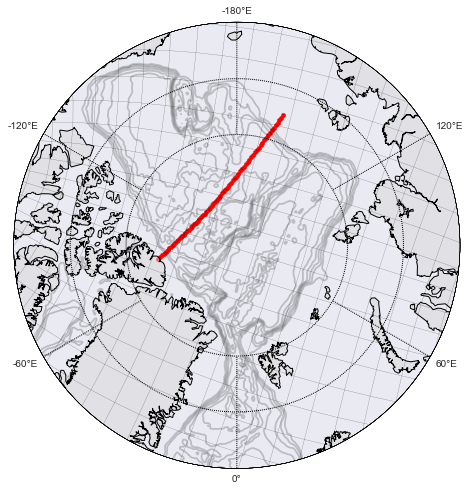

In [68]:
fig = plt.figure(figsize = (8,8))
m,x_lon,y_lat=map.mapping(70)
A= [170] 
B= [245]

for i in range (1,70):
    A.append(A[i-1]+2)
    B.append(B[i-1]+1)
a=A[:]
b=B[:]
m.scatter(x_lon[a,b],y_lat[a,b],color='r')

In [21]:
def load_v(vel_comp,T, tmask, ENG, key ):
    '''
    This function is designed to obtain velocity field
    ======================================================
    '''
    vels ={'U':'vozocrtx','V':'vomecrty','W':'vovecrtz'}

    with nc.Dataset(glob.glob('/ocean/xiaoxiny/research/result_jasper/data_eng3/*%s*%s*%s.nc'%(ENG,vel_comp,T))[0])\
as temp:
        data  = temp.variables[vels[vel_comp]][0,:,400:,:]
    #data  = np.ma.masked_where(tmask == 0,data)
    return data

In [22]:
def roate(orig_xcomp,orig_ycomp, xslope,yslope):
    '''
    orig_ycomp: can be v/ or flux in y direction
    orig_xcomp: can be u/ or flux in x direction
    '''
    z = (yslope**2 + xslope**2)**0.5
    # orig componant --> cross-section 
    cr_comp =-orig_xcomp*yslope/z + orig_ycomp*xslope/z
    # orig componant --> Along-section 
    al_comp = orig_xcomp*xslope/z + orig_ycomp*yslope/z
    return cr_comp,al_comp

In [23]:
Year = np.linspace(2002,2013,2013-2002+1)
Year

array([ 2002.,  2003.,  2004.,  2005.,  2006.,  2007.,  2008.,  2009.,
        2010.,  2011.,  2012.,  2013.])

In [29]:
# grid for plotting
x1d=np.linspace(0,nav_lon[:,0].shape[0],nav_lat[:,0].shape[0])
y1d=np.linspace(0,nav_lon[0,:].shape[0],nav_lat[0,:].shape[0])
x2d,y2d=np.meshgrid(y1d,x1d)

# isopynal 27.8-28.05

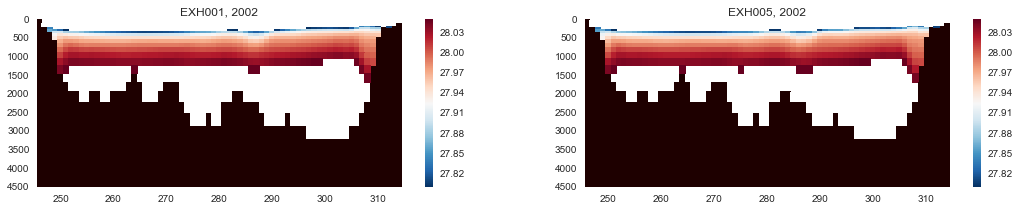

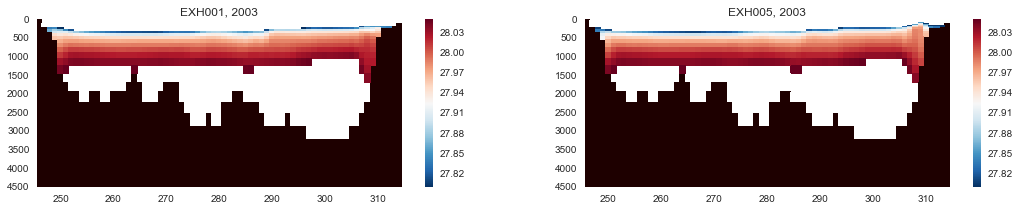

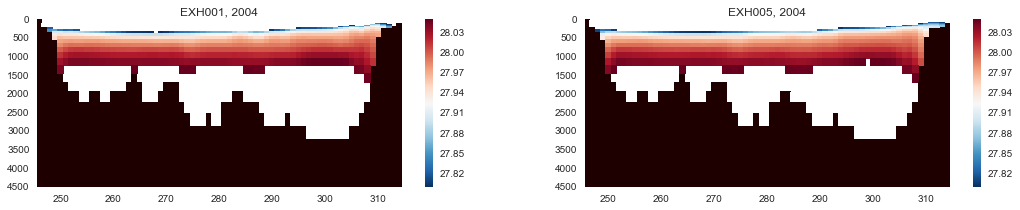

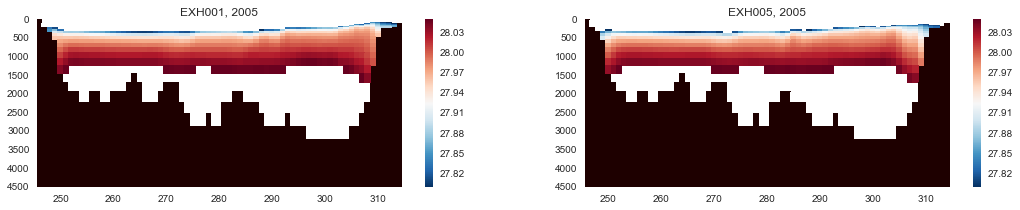

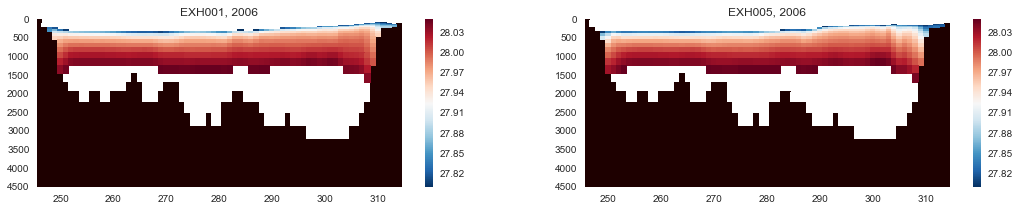

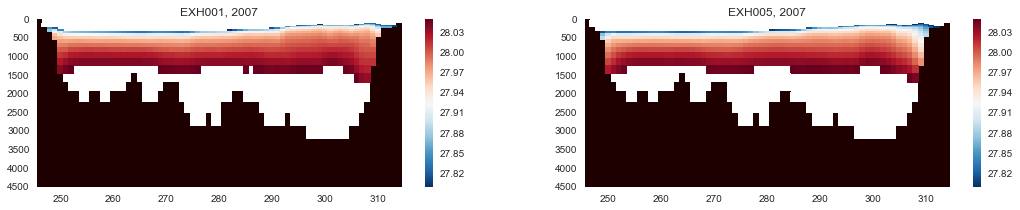

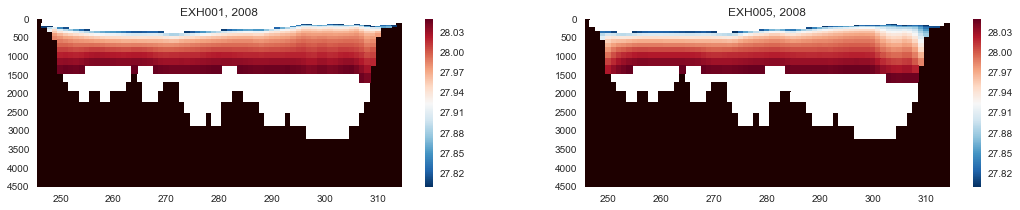

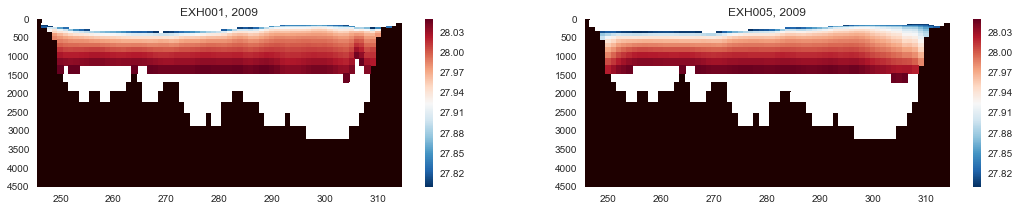

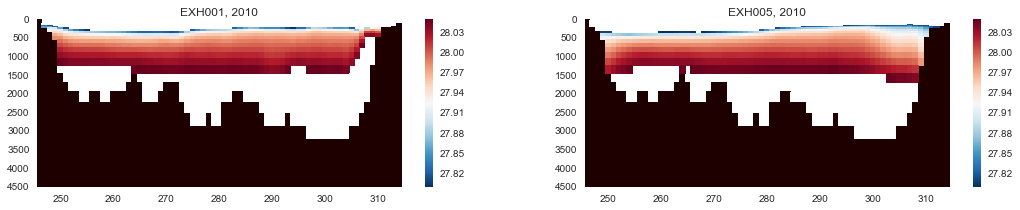

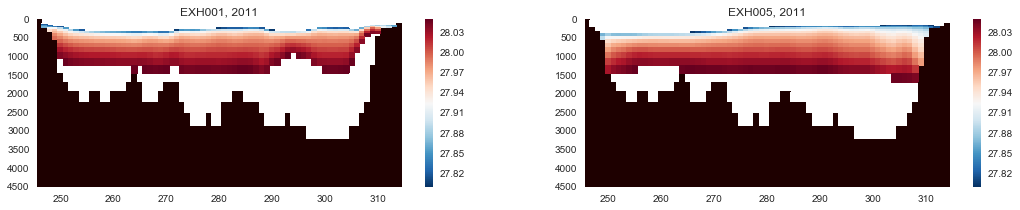

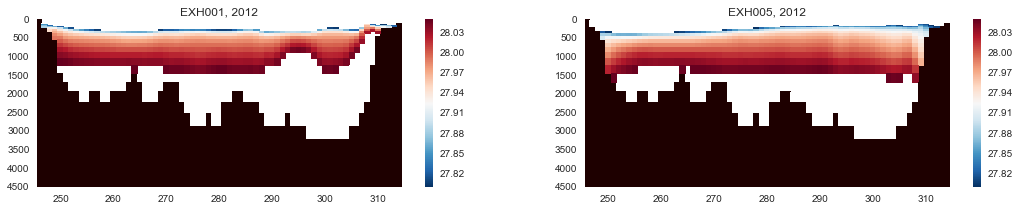

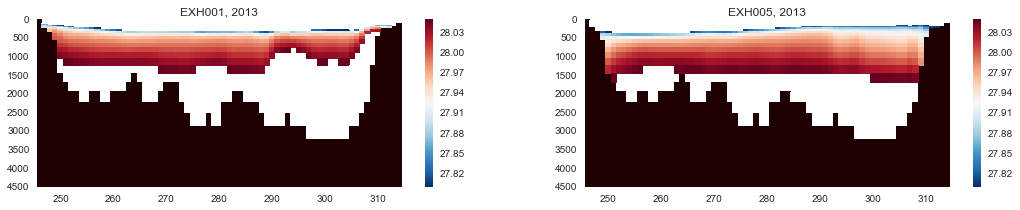

In [69]:
plot_two_runs(iso=[1027.8,1028.05],vlim=[27.8,28.05],coor=x2d[a,b])

* seems too surface accoring previews iteraturals.

Previous research assumes that the 27.8 isopycnal is a reasonable lower limit of the halocline. The 28.05 isopycnal, around 1500 m depth, which is close to the upper limit of the Lomonosov Ridge, is used to distinguish between the intermediate and deep waters (\cite{smethie2000renewal}). 

## change from 28.05 -> 28.15, which is almost everything influx from the Makarov entrance

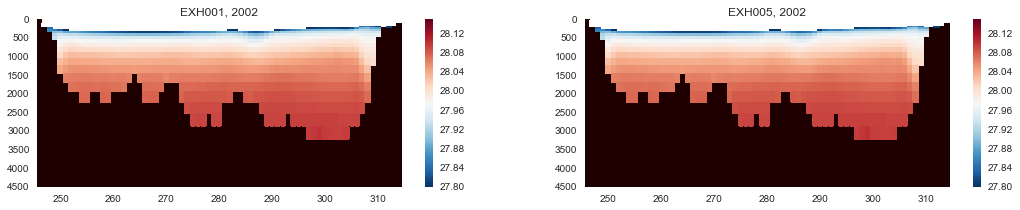

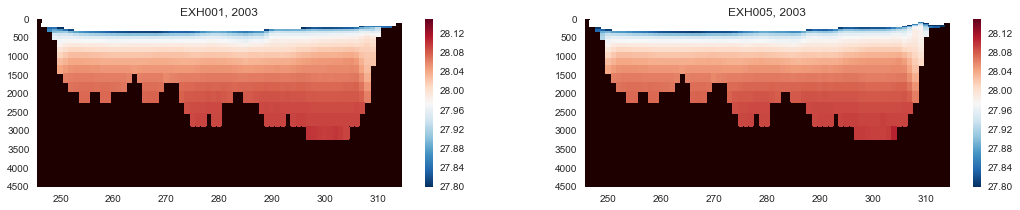

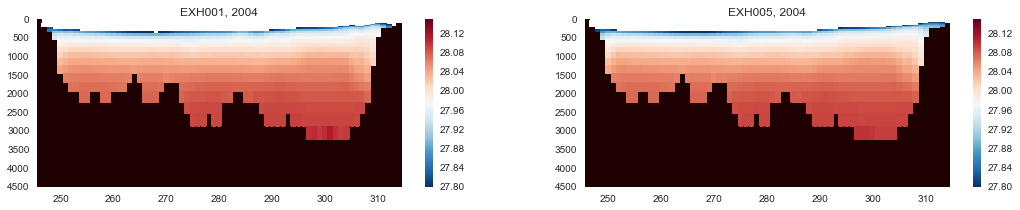

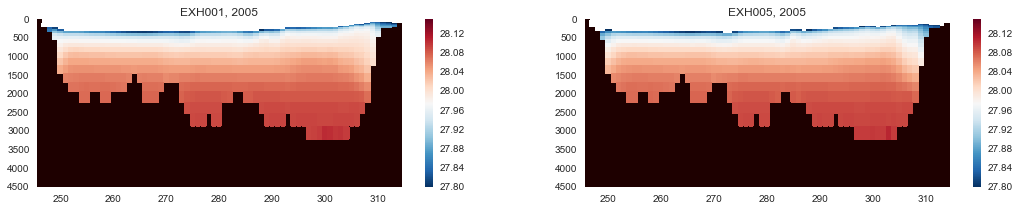

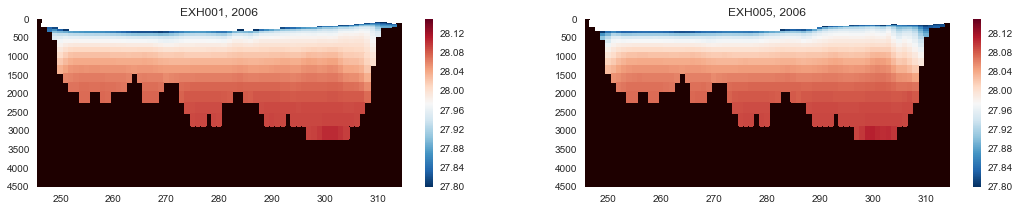

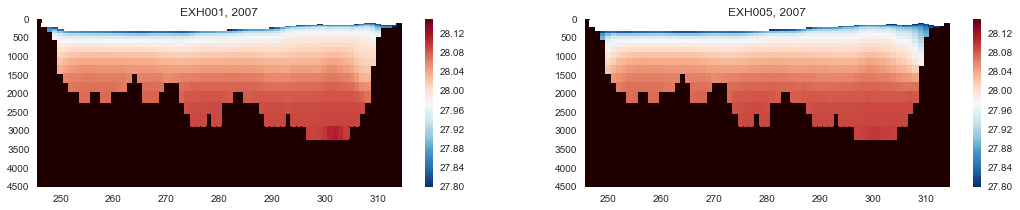

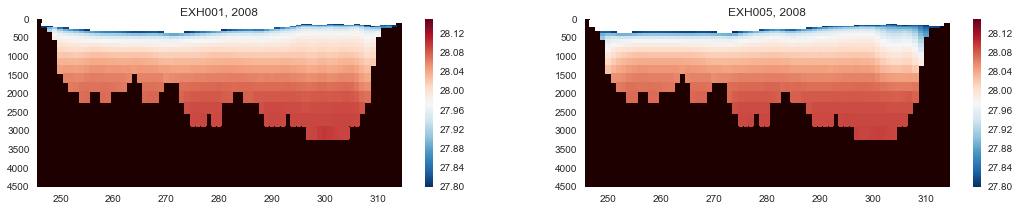

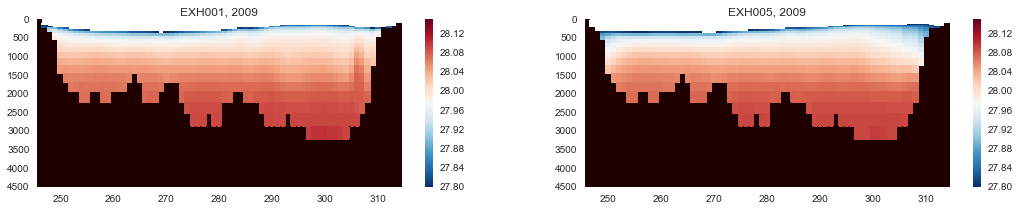

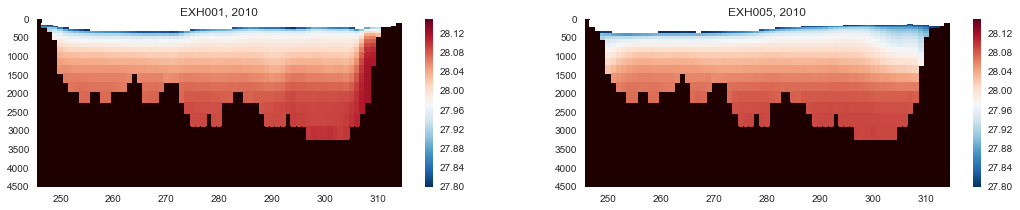

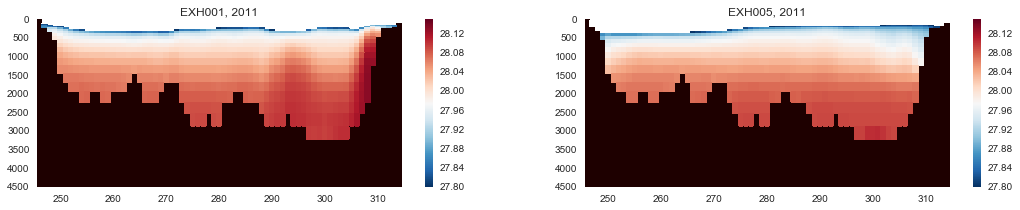

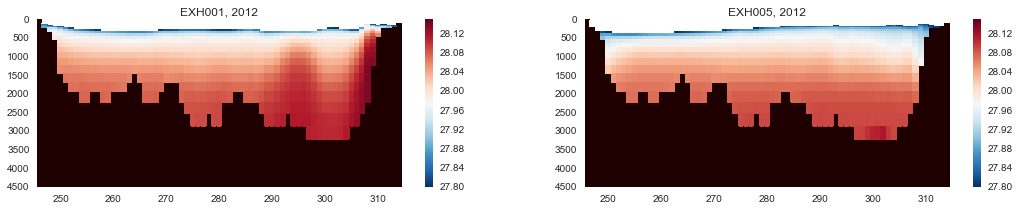

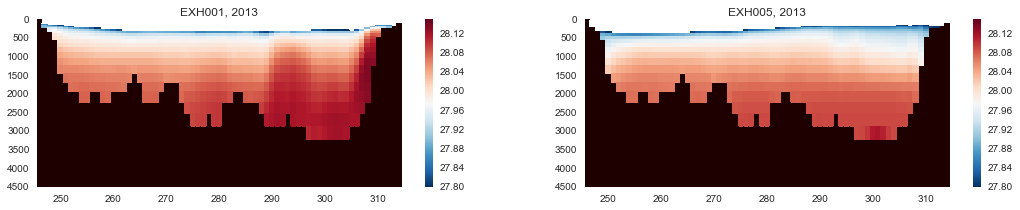

In [70]:
plot_two_runs(iso=[1027.8,1028.15],vlim=[27.8,28.15],coor=x2d[a,b])

# the boundary current we are really interested in 

/home/xiaoxiny/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future


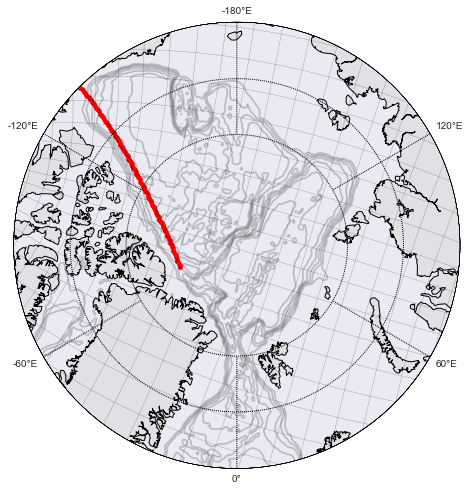

In [73]:
fig = plt.figure(figsize = (8,8))
m,x_lon,y_lat=map.mapping(70)
A= [170] 
B= [265]

for i in range (1,140):
    A.append(A[i-1]+1.2)
    B.append(B[i-1]-1)
a=A[:]
b=B[:]
m.scatter(x_lon[a,b],y_lat[a,b],color='r')

/home/xiaoxiny/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future
  if __name__ == '__main__':
/home/xiaoxiny/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:3117: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future
  dout = self.data[indx]
/home/xiaoxiny/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:3172: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future
  dout._mask = _mask[indx]


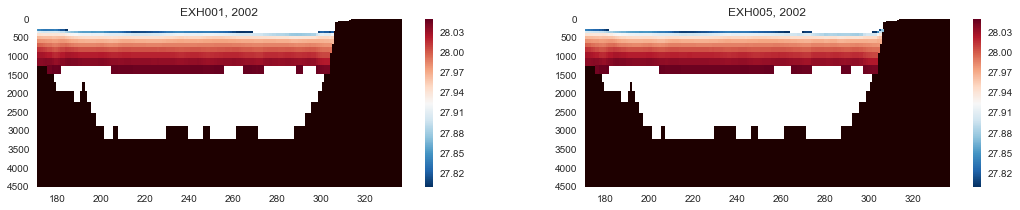

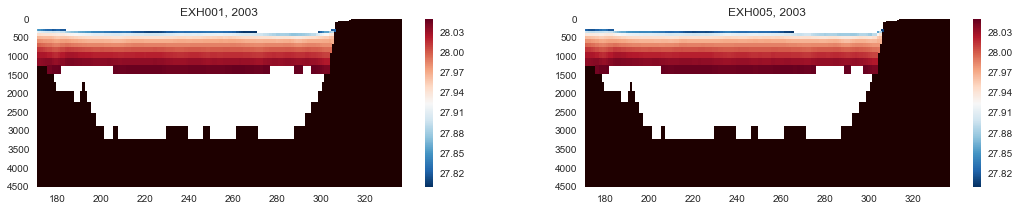

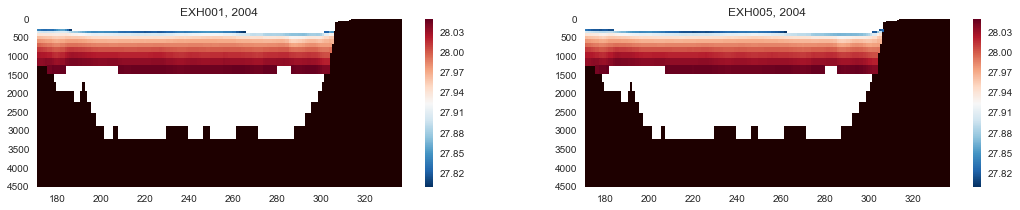

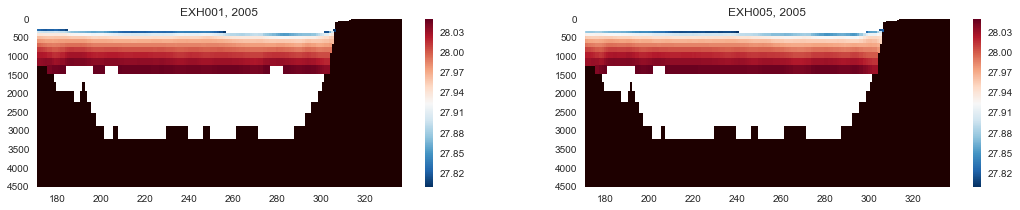

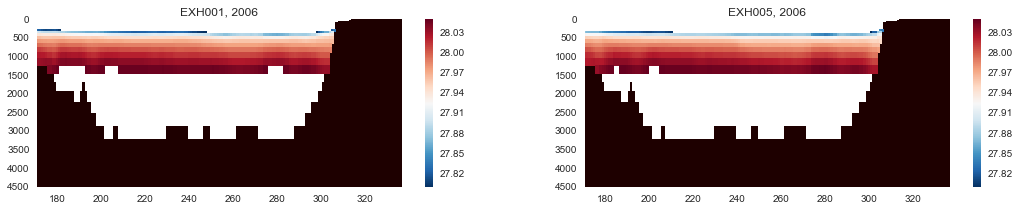

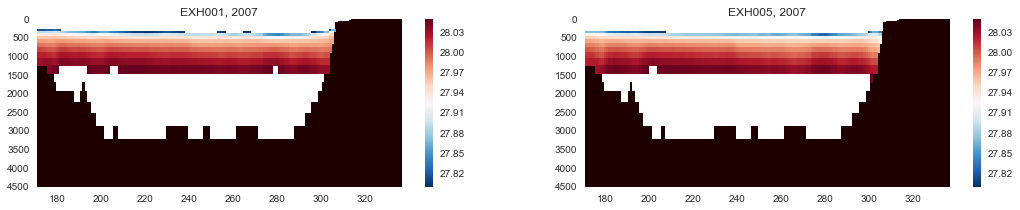

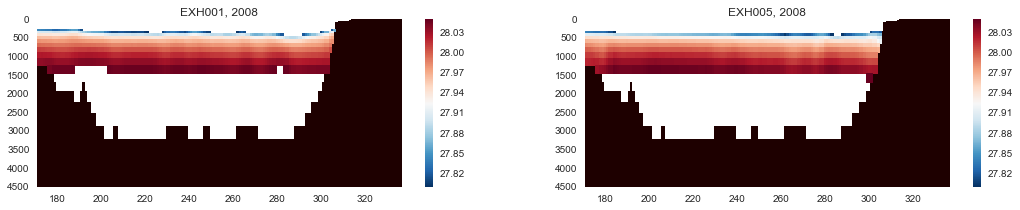

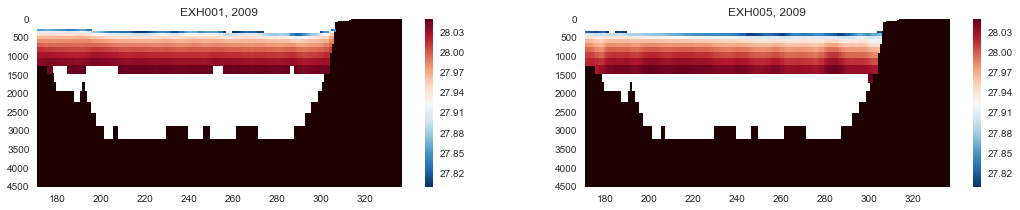

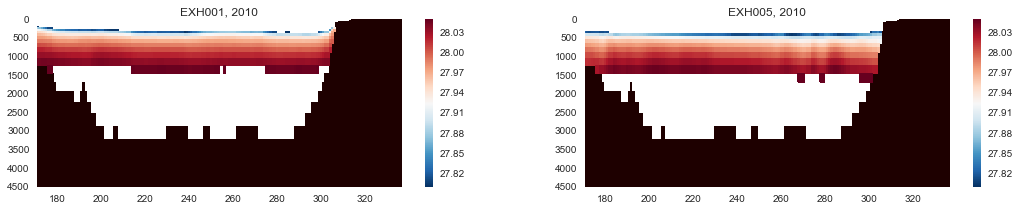

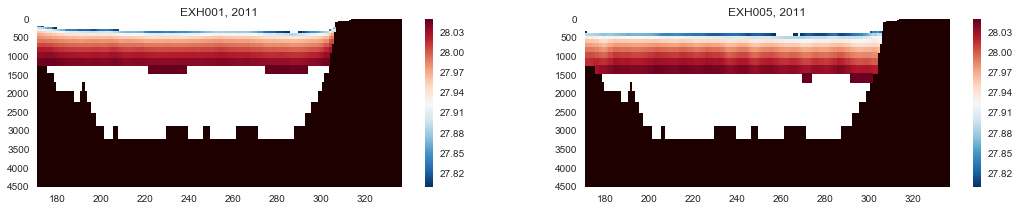

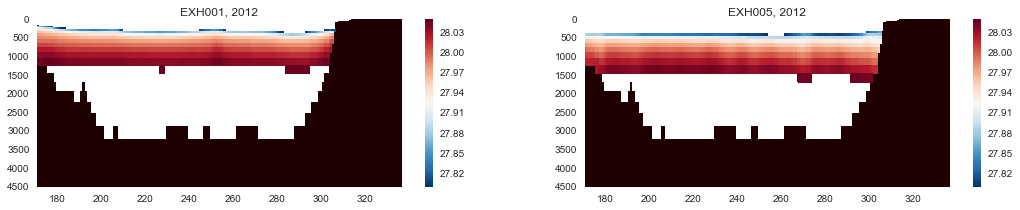

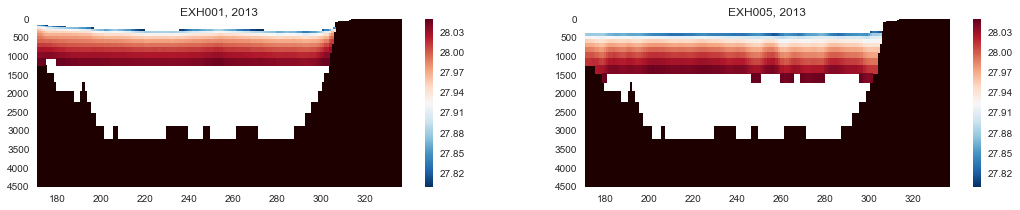

In [74]:
plot_two_runs(iso=[1027.8,1028.05],vlim=[27.8,28.05],coor=y2d[a,b])

Above doesn't give huge difference..

# Try another cross section?

/home/xiaoxiny/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future


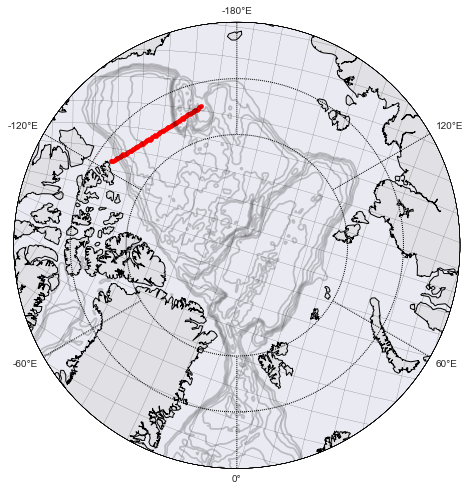

In [116]:
fig = plt.figure(figsize = (8,8))
m,x_lon,y_lat=map.mapping(70)
A= [240] 
B= [170]

for i in range (1,80):
    A.append(A[i-1]+0.8)
    B.append(B[i-1]+1)
a=A[10:]
b=B[10:]
m.scatter(x_lon[a,b],y_lat[a,b],color='r')

/home/xiaoxiny/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future
  if __name__ == '__main__':
/home/xiaoxiny/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:3117: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future
  dout = self.data[indx]
/home/xiaoxiny/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:3172: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future
  dout._mask = _mask[indx]


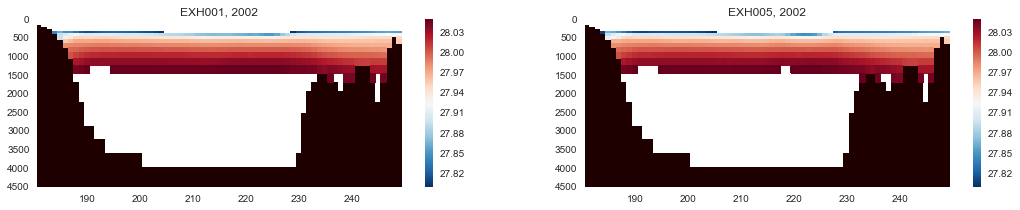

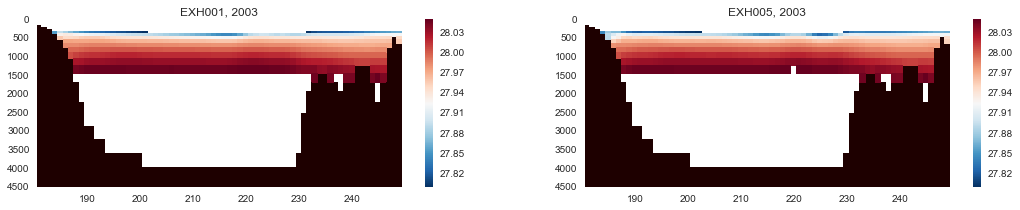

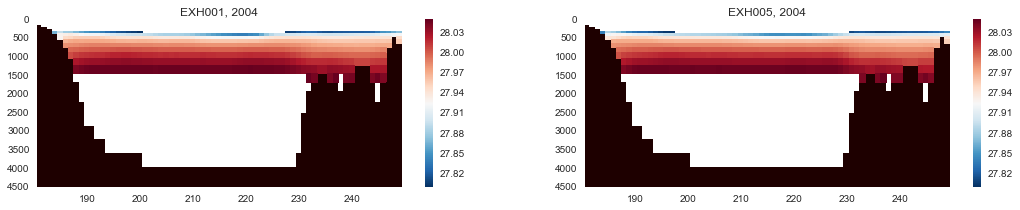

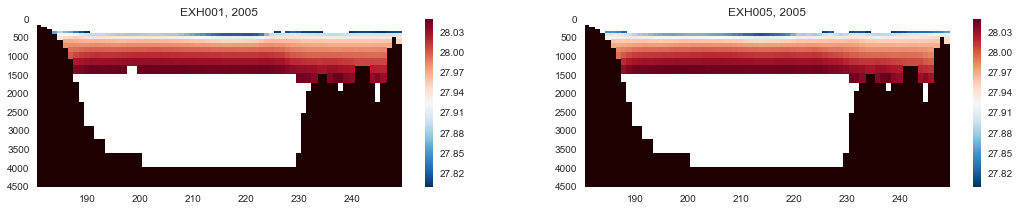

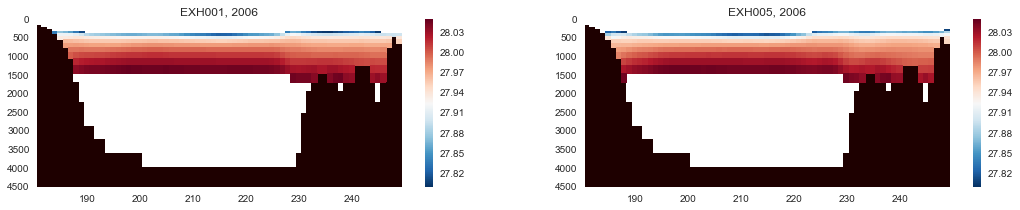

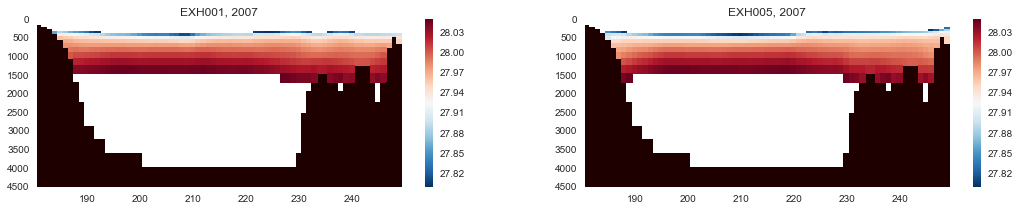

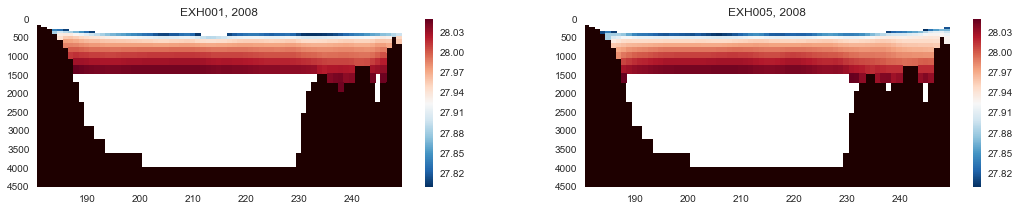

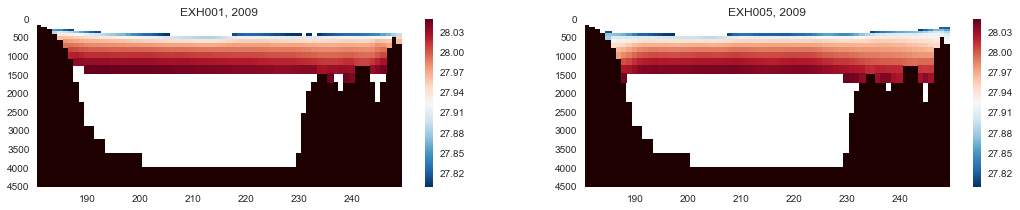

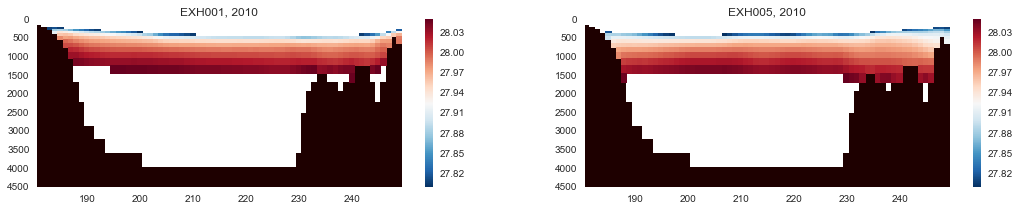

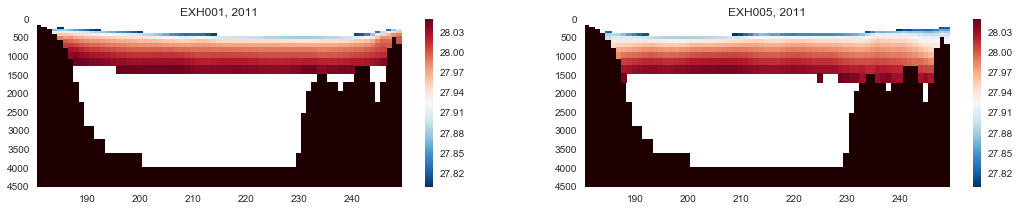

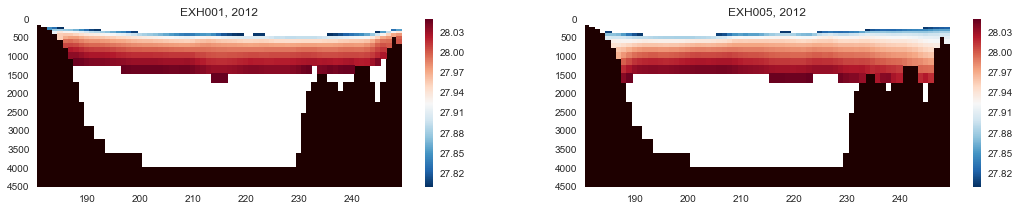

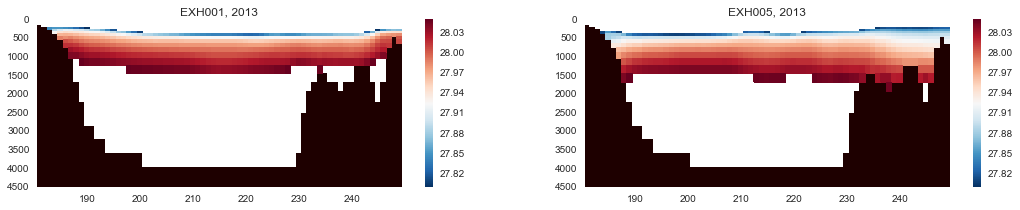

In [117]:
plot_two_runs(iso=[1027.8,1028.05],vlim=[27.8,28.05],coor=x2d[a,b])

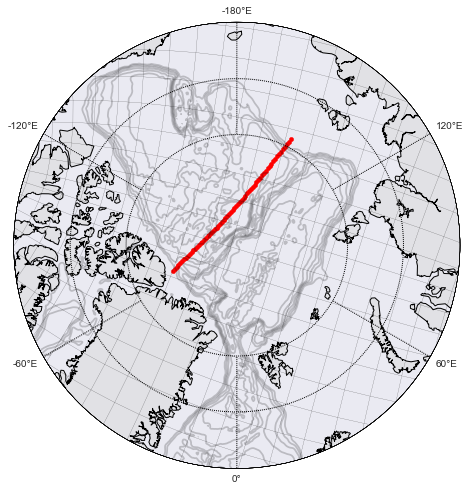

In [132]:
fig = plt.figure(figsize = (8,8))
m,x_lon,y_lat=map.mapping(70)
A= [165] 
B= [260]

for i in range (1,65):
    A.append(A[i-1]+2)
    B.append(B[i-1]+1)
a=A[:]
b=B[:]
m.scatter(x_lon[a,b],y_lat[a,b],color='r')

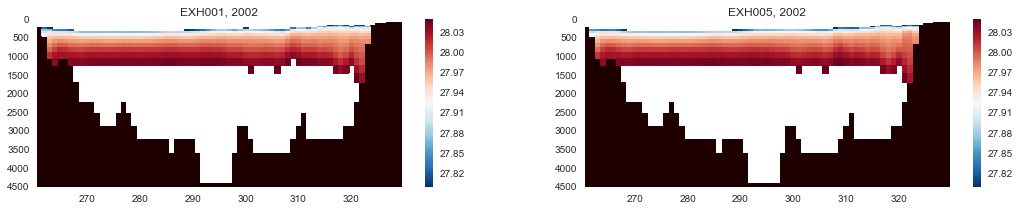

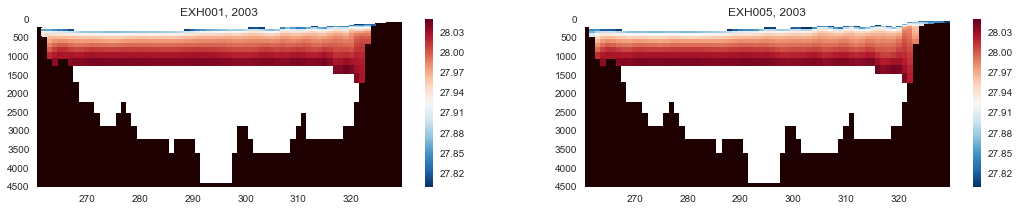

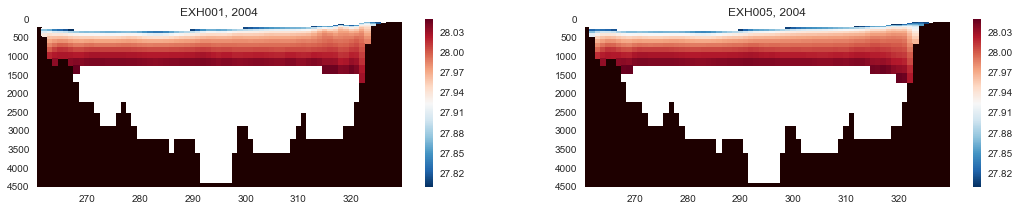

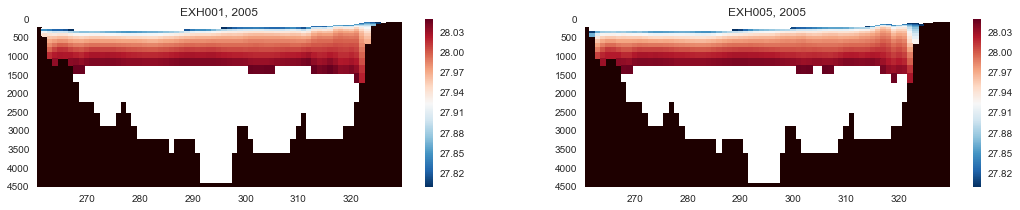

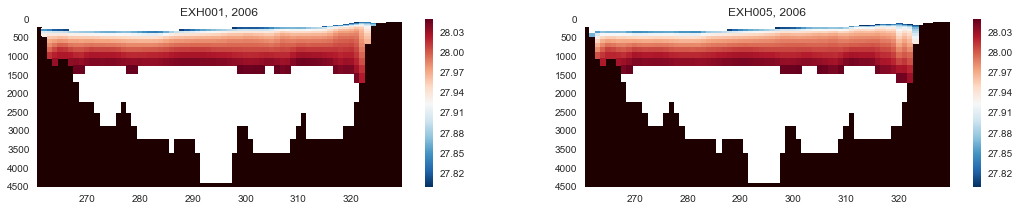

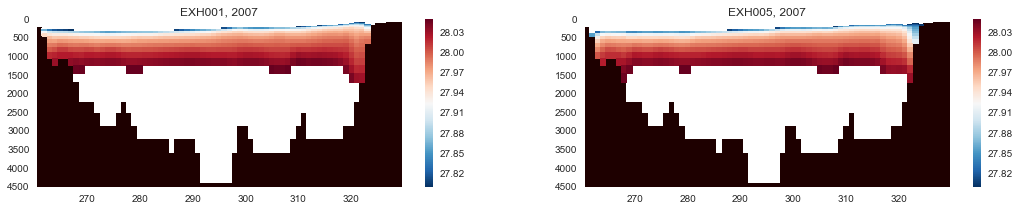

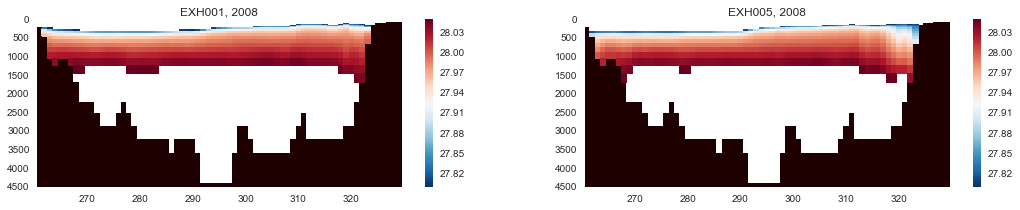

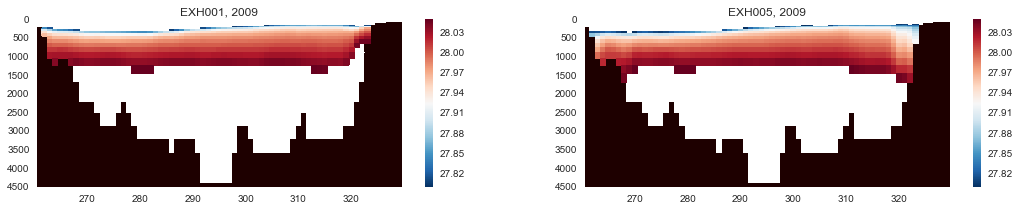

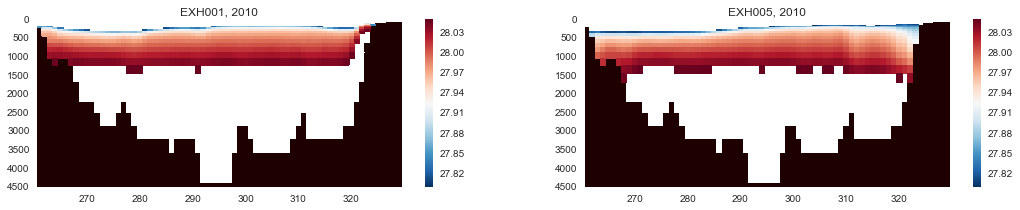

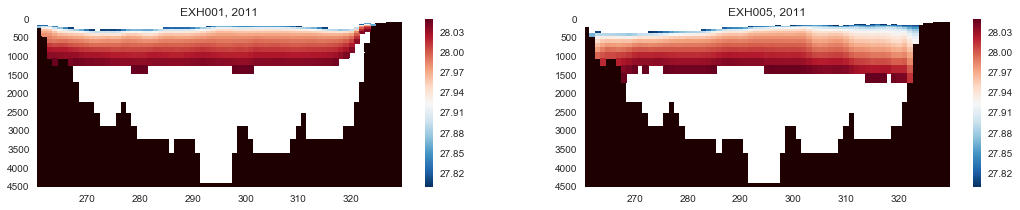

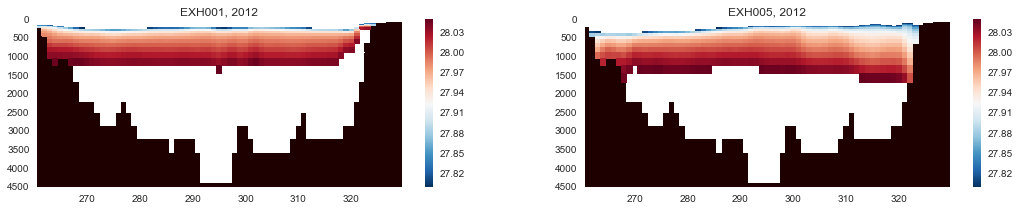

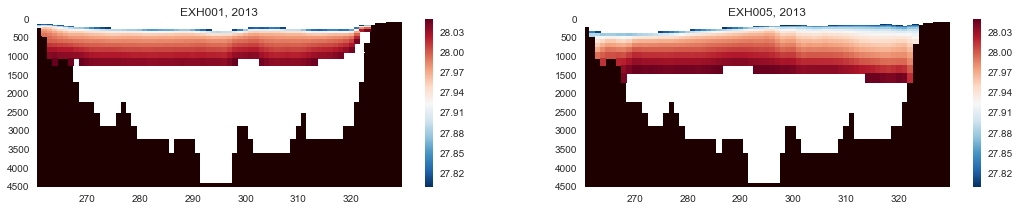

In [131]:
plot_two_runs(iso=[1027.8,1028.05],vlim=[27.8,28.05],coor=x2d[a,b])